Here are some of the most popular and robust **weekly** trading strategies, plus a concrete Python backtest template using `vectorbt` so you can get started right away.

---

## 🔍 Top Weekly Trading Strategies

1. **Moving-Average Crossover (Weekly)**

   * Buy when the short‐term MA (e.g. 5 week EMA) crosses **above** the long‐term MA (e.g. 20 week EMA).
   * Sell when it crosses **below**.
   * Filters out intra‐week noise and captures medium‐term trends.

2. **52-Week High Breakout**

   * Go long when price closes at a new 52-week high on the weekly chart.
   * Exit on a close back below the breakout level or a fixed trailing stop.
   * Simple momentum approach with proven edge in equities.

3. **RSI Overbought/Oversold (Weekly)**

   * Buy when the 14-week RSI dips below 30 (oversold) then turns up.
   * Sell when RSI rises above 70 (overbought) then turns down.
   * Combines mean-reversion with trend-confirmation.

4. **Bollinger Band Squeeze & Breakout**

   * On a weekly chart, look for narrow BBands (low volatility).
   * Enter in direction of breakout beyond the bands; exit on pullback inside bands.

5. **Mean-Reversion on Weekly Pullbacks**

   * After a 3-5 week pullback in an uptrend (price above 20 week MA), buy near the MA.
   * Exit on renewed weakness or a breach of a multi-week low.

---

## 🐍 Backtest Template with `vectorbt`

Below is a self-contained example showing how to backtest a **5×20 EMA crossover** on **weekly** data for any ticker. You can adapt it to the other strategies by swapping out the signal logic.

### How to Adapt for Other Strategies

* **52-Week High Breakout**

  ```python
  rolling_high = weekly_close.rolling(52).max()
  entries = weekly_close > rolling_high.shift(1)
  exits   = weekly_close < rolling_high.shift(1) * 0.98   # e.g. 2% trailing stop
  ```

* **RSI Overbought/Oversold**

  ```python
  rsi = vbt.RSI.run(weekly_close, window=14).rsi
  entries = (rsi < 30) & (rsi.shift(1) < rsi)
  exits   = (rsi > 70) & (rsi.shift(1) > rsi)
  ```

* **Bollinger Band Breakout**

  ```python
  bb = vbt.BBANDS.run(weekly_close, window=20, std=2)
  entries = weekly_close > bb.upper
  exits   = weekly_close < bb.middle
  ```

---

## ✅ Next Steps

1. **Experiment** with different parameter values (e.g. EMA spans, RSI window).
2. **Add filters** such as minimum volume or trend-confirmation (e.g. price above its 50 week MA).
3. **Analyze risk**: incorporate position sizing rules, stop-loss, and take-profit levels.
4. **Validate** on multiple tickers and different asset classes (FX, commodities).
5. **Deploy** your favorite strategy to paper-trade via a broker API (e.g. Kite/Zerodha/Groww).

This template should get you up and running fast—happy backtesting!


/var/folders/mn/tx231v5158797chnp22wm9000000gp/T/ipykernel_9994/168883968.py:13: FutureWarning:

YF.download() has changed argument auto_adjust default to True



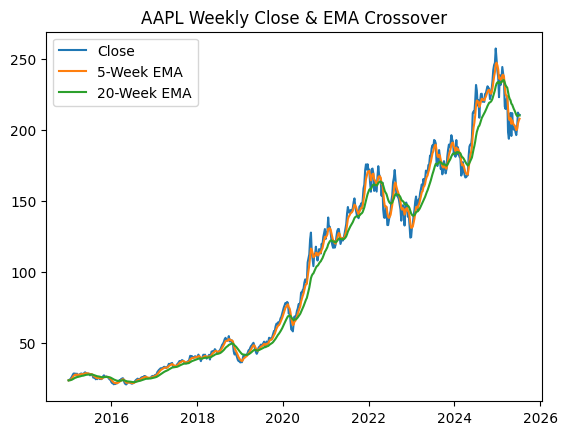

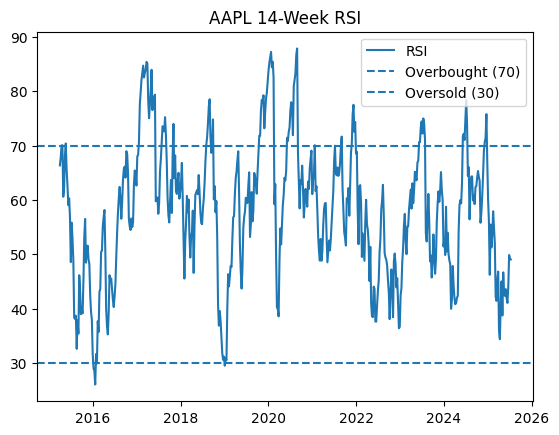

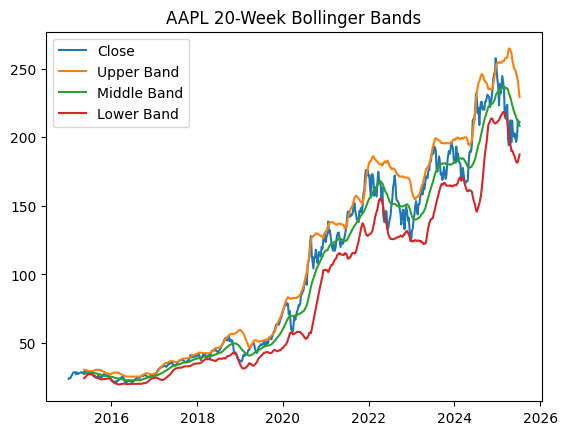

In [3]:
# ─── Install prerequisites ─────────────────────────────────────────────────────
# pip install yfinance pandas matplotlib ta

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from ta.momentum import RSIIndicator
from ta.volatility import BollingerBands

# ─── 1. Download weekly data ────────────────────────────────────────────────────
symbol = "AAPL"
# interval="1wk" gives weekly bars; you can also download daily and resample to 'W-FRI'
data = yf.download(symbol, start="2015-01-01", interval="1wk", progress=False)
weekly_close = data['Close'].squeeze()

# ─── 2. Compute EMAs ───────────────────────────────────────────────────────────
short_ema = weekly_close.ewm(span=5, adjust=False).mean()
long_ema  = weekly_close.ewm(span=20, adjust=False).mean()

# ─── 3. Compute RSI ────────────────────────────────────────────────────────────
rsi = RSIIndicator(weekly_close, window=14).rsi()

# ─── 4. Compute Bollinger Bands ───────────────────────────────────────────────
bb = BollingerBands(weekly_close, window=20, window_dev=2)
upper = bb.bollinger_hband()
middle= bb.bollinger_mavg()
lower = bb.bollinger_lband()

# ─── 5. Plot Weekly Close with EMAs ────────────────────────────────────────────
plt.figure()
plt.plot(weekly_close, label='Close')
plt.plot(short_ema, label='5-Week EMA')
plt.plot(long_ema, label='20-Week EMA')
plt.title(f'{symbol} Weekly Close & EMA Crossover')
plt.legend()
plt.show()

# ─── 6. Plot 14-Week RSI ───────────────────────────────────────────────────────
plt.figure()
plt.plot(rsi, label='RSI')
plt.axhline(70, linestyle='--', label='Overbought (70)')
plt.axhline(30, linestyle='--', label='Oversold (30)')
plt.title(f'{symbol} 14-Week RSI')
plt.legend()
plt.show()

# ─── 7. Plot 20-Week Bollinger Bands ───────────────────────────────────────────
plt.figure()
plt.plot(weekly_close, label='Close')
plt.plot(upper, label='Upper Band')
plt.plot(middle, label='Middle Band')
plt.plot(lower, label='Lower Band')
plt.title(f'{symbol} 20-Week Bollinger Bands')
plt.legend()
plt.show()
